## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping
PATIENCE = [10, 20]
results = {}
for patience in PATIENCE:
    earlystop = EarlyStopping(monitor="val_acc", 
                          patience=patience, 
                          verbose=1
                          )
    """Code Here
    撰寫你的訓練流程並將結果用 dictionary 紀錄
    """
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["acc"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[earlystop]
             )

    # Collect results
    result = f"patience {patience}"
    results[result] = {}
    results[result]["train_loss"] = model.history.history["loss"]
    results[result]["valid_loss"] = model.history.history["val_loss"]
    results[result]["train_acc"] = model.history.history["acc"]
    results[result]["valid_acc"] = model.history.history["val_acc"]
    

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512 

Epoch 2/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.7360 - acc: 0.3970 - val_loss: 1.9923 - val_acc: 0.2815
Epoch 3/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.6122 - acc: 0.4370 - val_loss: 1.8429 - val_acc: 0.3515
Epoch 4/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.5399 - acc: 0.4647 - val_loss: 1.7350 - val_acc: 0.3996
Epoch 5/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.4863 - acc: 0.4815 - val_loss: 1.6554 - val_acc: 0.4216
Epoch 6/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.4401 - acc: 0.4979 - val_loss: 1.5954 - val_acc: 0.4415
Epoch 7/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.3999 - acc: 0.5159 - val_loss: 1.5574 - val_acc: 0.4520
Epoch 8/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.3653 - acc: 0.5261 - val_loss: 1.5303 - val_acc: 0.4614
Epoch 9/50
50000/50000 [=================

patience 10


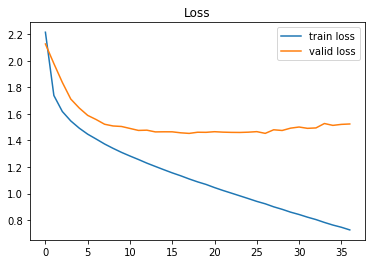

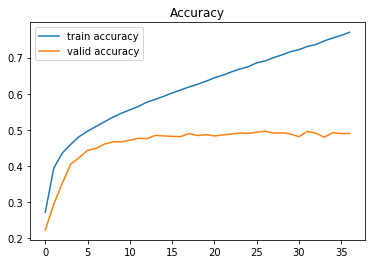

patience 20


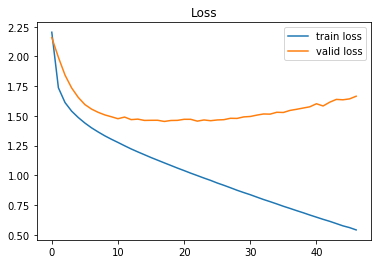

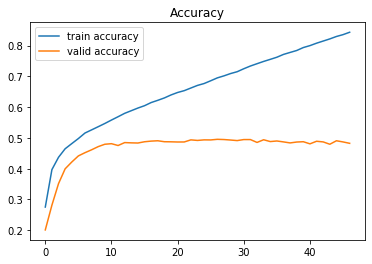

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
for patience in PATIENCE:
    result = f"patience {patience}"
    print(result)
    train_loss = results[result]["train_loss"]
    valid_loss = results[result]["valid_loss"]
    train_acc = results[result]["train_acc"]
    valid_acc = results[result]["valid_acc"]
    plt.plot(range(len(train_loss)), train_loss, label="train loss")
    plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
    plt.legend()
    plt.title("Loss")
    plt.show()

    plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
    plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
    plt.legend()
    plt.title("Accuracy")
    plt.show()